In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('jshare.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


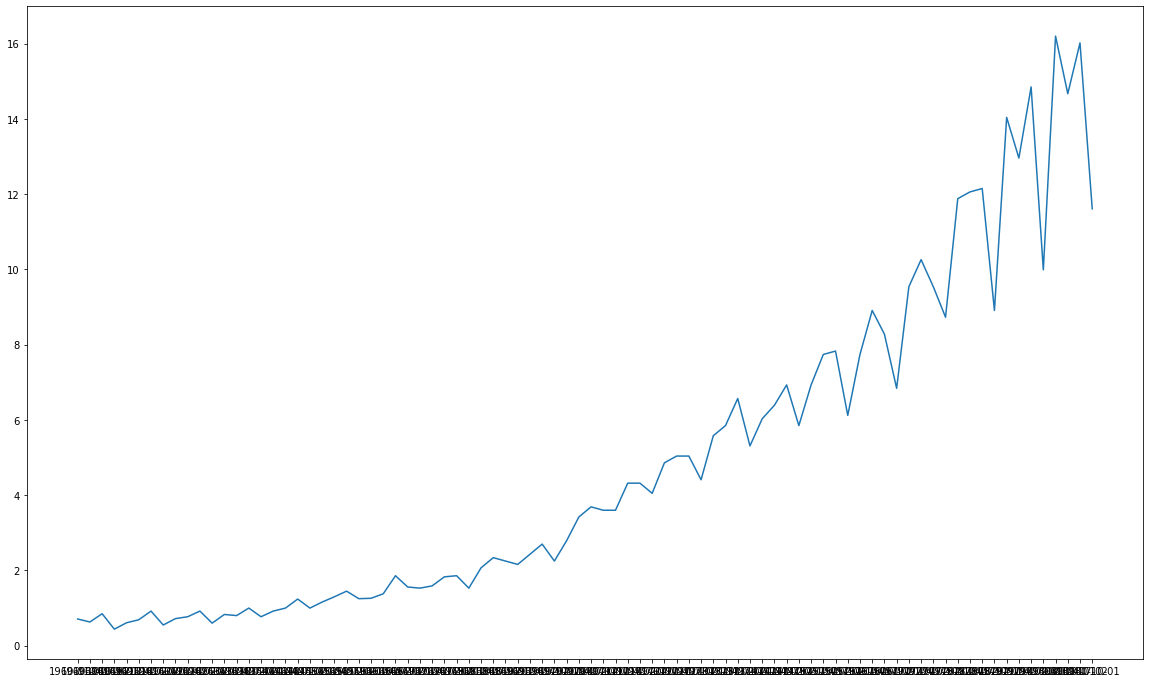

In [3]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
adfuller(data['data']) # Null --> None Stationary

(2.7420165734574735,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301102)

In [6]:
data['data'] = np.log(data['data'])

In [7]:
adfuller(data['data'])

(-0.8040574622338387,
 0.8179273123168606,
 4,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -142.1892728398871)

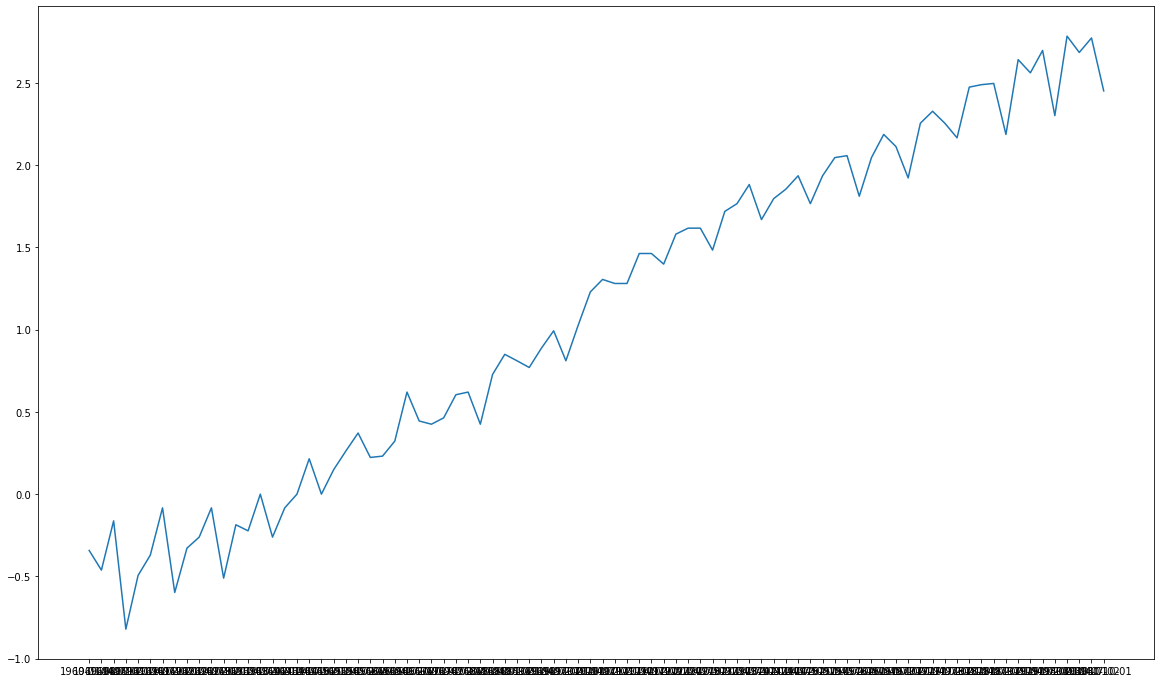

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [14]:
sample = pd.Series([1, 1, 2, 3, 5, 8, 13, 21, 32, 55])
sample.diff(4)

0     NaN
1     NaN
2     NaN
3     NaN
4     4.0
5     7.0
6    11.0
7    18.0
8    27.0
9    47.0
dtype: float64

In [15]:
data['data'] = data['data'].diff()

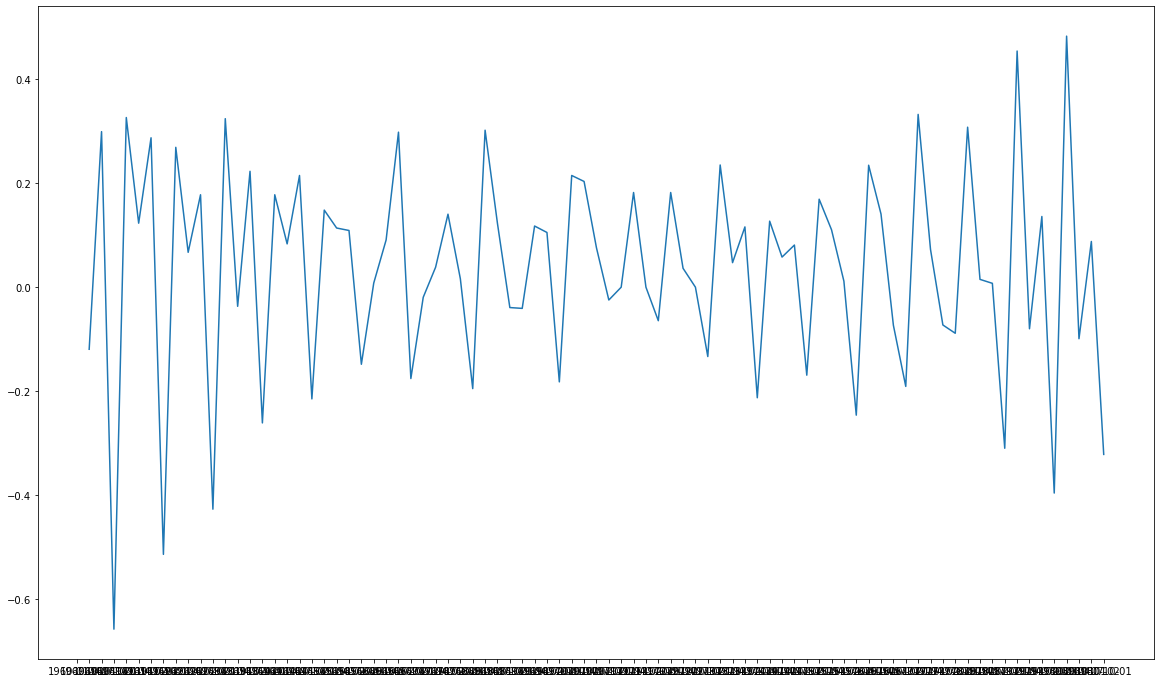

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [17]:
data = data.drop(data.index[0])
adfuller(data['data'])

(-4.317043945811843,
 0.00041497314044405543,
 5,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 -140.7202208245293)

In [18]:
data['data'] = data['data'].diff(4)

In [19]:
data

,date,data
1,1960-04-01,NaN
2,1960-07-02,NaN
3,1960-10-01,NaN
4,1961-01-01,NaN
5,1961-04-02,0.242778
...,...,...
79,1979-10-01,-0.086260
80,1980-01-01,0.028690
81,1980-04-01,-0.019164
82,1980-07-02,-0.048099


In [20]:
data = data.drop([1, 2, 3, 4], axis=0)
adfuller(data['data'])

(-6.63080510991426,
 5.721578695136251e-09,
 5,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 -130.6040481022201)

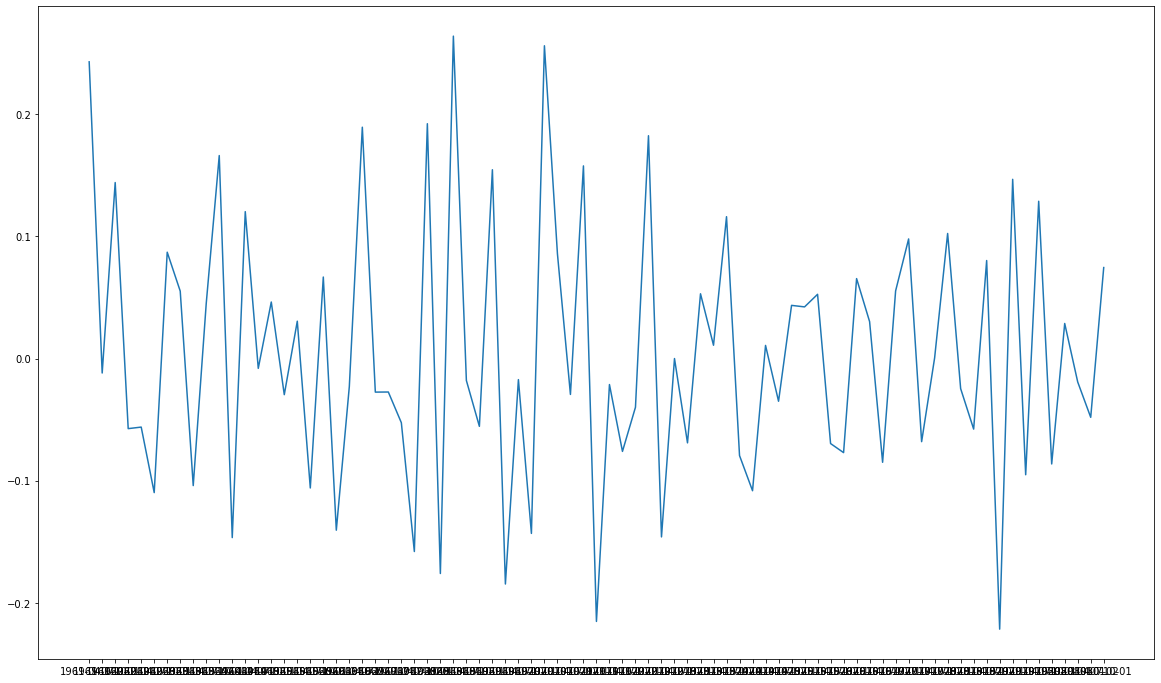

In [21]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data2 = pd.read_csv('jshare.csv')
data2.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
model = SARIMAX(data2['data'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))

In [5]:
res = model.fit()

/home/masoud/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [6]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   data   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                 -39.000
Date:                                Sat, 27 Feb 2021   AIC                            100.001
Time:                                        02:59:28   BIC                            126.065
Sample:                                             0   HQIC                           110.443
                                                 - 84                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5945      0.204     -7.810      0.000      -1.995      -1.194
ar.L2         -0.9855      0.326     -3.020      0.003      -1.625      -0.346
ar.L3         -0.1429      0.193     -0.739      0.460      -0.522       0.236
ma.L1          0.8381      0.540      1.551      0.121      -0.221       1.897
ma.L2          0.0061      0.394      0.016      0.988      -0.766       0.779
ma.L3         -0.6582      0.479     -1.375      0.169      -1.596       0.280
ar.S.L4       -0.3870      0.784     -0.494      0.622      -1.923       1.149
ar.S.L8       -0.7802      0.791     -0.986      0.324      -2.331       0.771
ma.S.L4        0.2783      0.773      0.360      0.719      -1.236       1.793
ma.S.L8        0.8545      0.777      1.100      0.272      -0.669       2.378
sigma2         0.1451      0.110      1.318      0.187      -0.071       0.361
===================================================================================
Ljung-Box (Q):                       26.69   Jarque-Bera (JB):                21.63
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              26.56   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
data2['sarimax'] = res.fittedvalues

In [8]:
data2

,date,data,sarimax
0,1960-01-01,0.71,0.000000
1,1960-04-01,0.63,0.710000
2,1960-07-02,0.85,0.630000
3,1960-10-01,0.44,0.850000
4,1961-01-01,0.61,0.795000
...,...,...,...
79,1979-10-01,9.99,10.292043
80,1980-01-01,16.20,16.252934
81,1980-04-01,14.67,14.377122
82,1980-07-02,16.02,16.723707


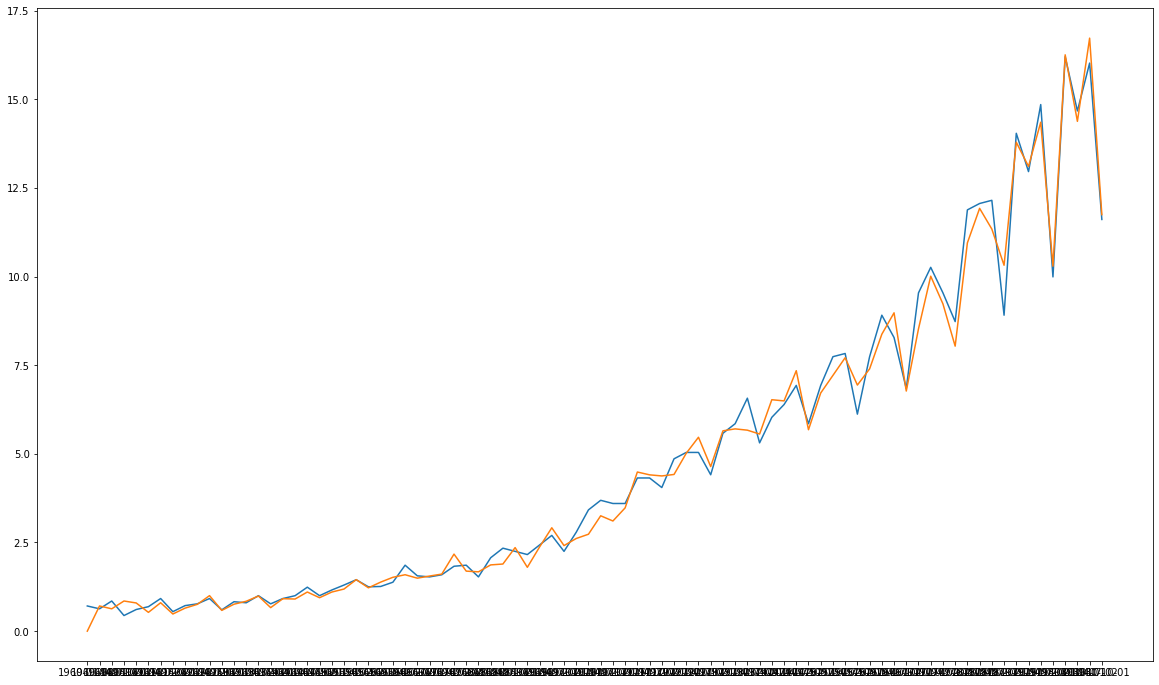

In [9]:
plt.figure(figsize=(20, 12))
plt.plot(data2['date'], data2['data'])
plt.plot(data2['date'], data2['sarimax'])
plt.show()

In [10]:
data2['sarimax'][:5] = np.NaN
forecast = res.predict(start=len(data2), end=len(data2) + 8)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
len(data2)

84

In [12]:
forecast = data2['sarimax'].append(forecast)

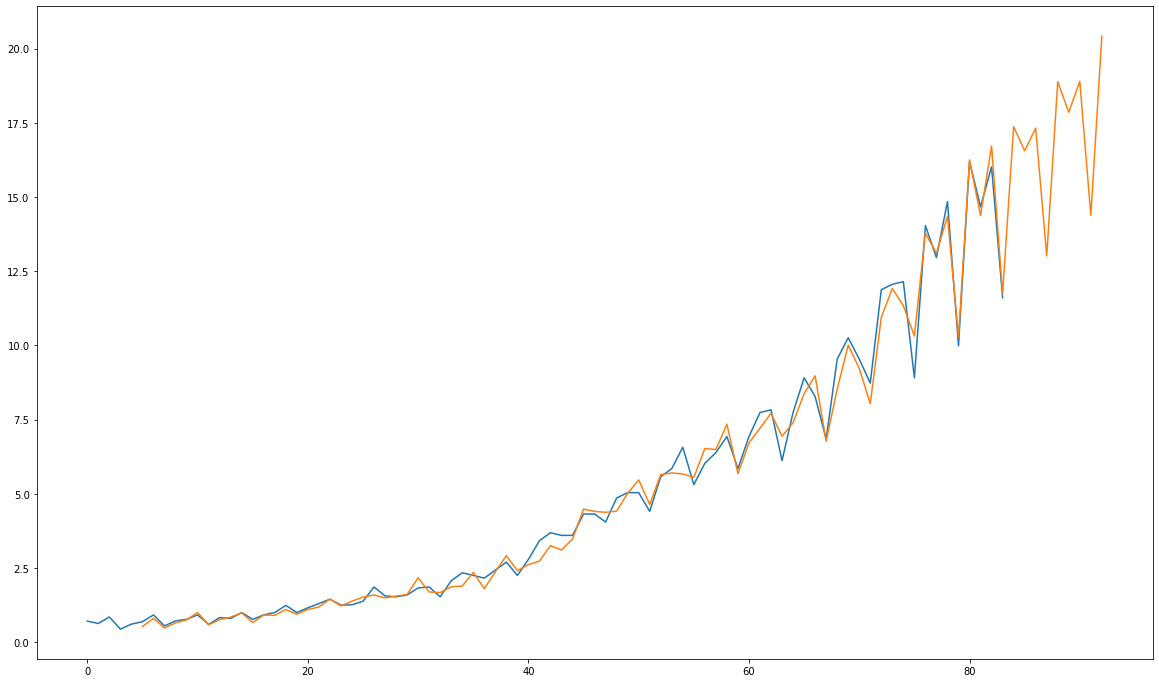

In [13]:
plt.figure(figsize=(20, 12))
plt.plot(data2['data'])
plt.plot(forecast)
plt.show()

In [14]:
from itertools import product
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
ps = range(0, 2, 1)
ds = 1
qs = range(0, 2, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [15]:
results = []
for order in params:
    try:
        model = SARIMAX(data2['data'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        results.append([order, res.aic])
    except:
        continue

In [16]:
r = pd.DataFrame(results)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
12,"(1, 1, 0, 0)",98.207760
4,"(0, 1, 0, 0)",100.126011
14,"(1, 1, 1, 0)",100.166907
13,"(1, 1, 0, 1)",100.170544
8,"(1, 0, 0, 0)",100.206514
6,"(0, 1, 1, 0)",100.713769
5,"(0, 1, 0, 1)",100.714480
7,"(0, 1, 1, 1)",101.256783
9,"(1, 0, 0, 1)",102.158002
15,"(1, 1, 1, 1)",102.160852


In [23]:
model = SARIMAX(data2['data'], order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 -46.104
Date:                            Sat, 27 Feb 2021   AIC                             98.208
Time:                                    03:02:27   BIC                            105.316
Sample:                                         0   HQIC                           101.056
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3005      0.142     -2.114      0.035      -0.579      -0.022
ma.L1         -0.6118      0.091     -6.738      0.000      -0.790      -0.434
sigma2         0.1860      0.023      8.108      0.000       0.141       0.231
===================================================================================
Ljung-Box (Q):                       45.28   Jarque-Bera (JB):                31.82
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              33.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
data2['sarimax'][:5] = np.NaN
forecast = res.predict(start=len(data2), end=len(data2) + 8)

/home/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
forecast = data2['sarimax'].append(forecast)

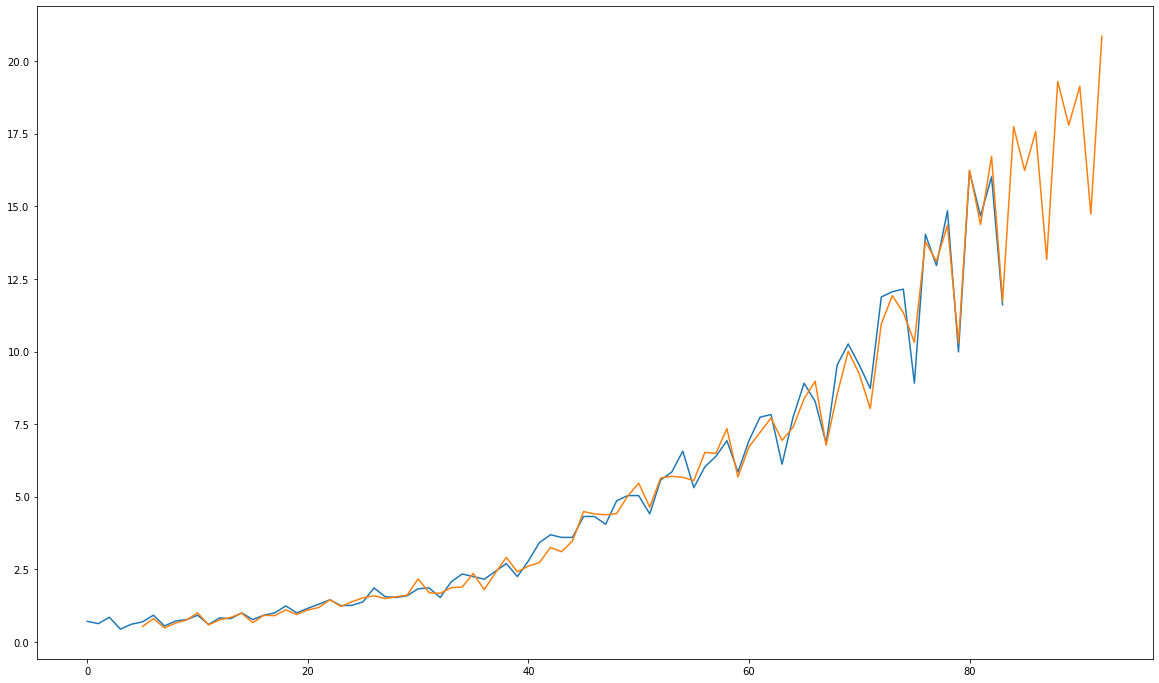

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(data2['data'])
plt.plot(forecast)
plt.show()